# Paquetes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

# Data

In [ ]:
link = "https://raw.githubusercontent.com/SergioDP94/Talleres/refs/heads/main/EDA/visitantes.csv"
df = pd.read_csv(link)
df.head()

,visitas,publicidad,temperatura,dia_semana
0,118.04,12.30,19.36,0
1,113.28,10.77,21.90,1
2,129.26,10.68,18.70,2
3,115.42,12.16,18.98,3
4,123.35,10.24,19.86,4


# Analisis exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   visitas      1368 non-null   float64
 1   publicidad   1368 non-null   float64
 2   temperatura  1368 non-null   float64
 3   dia_semana   1368 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 42.9 KB


<Axes: >

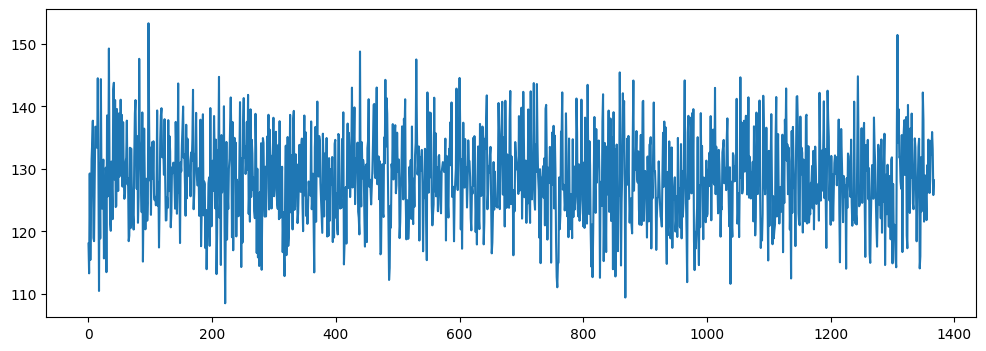

In [ ]:
df.visitas.plot(figsize=(12,4))

## Visualizacion

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

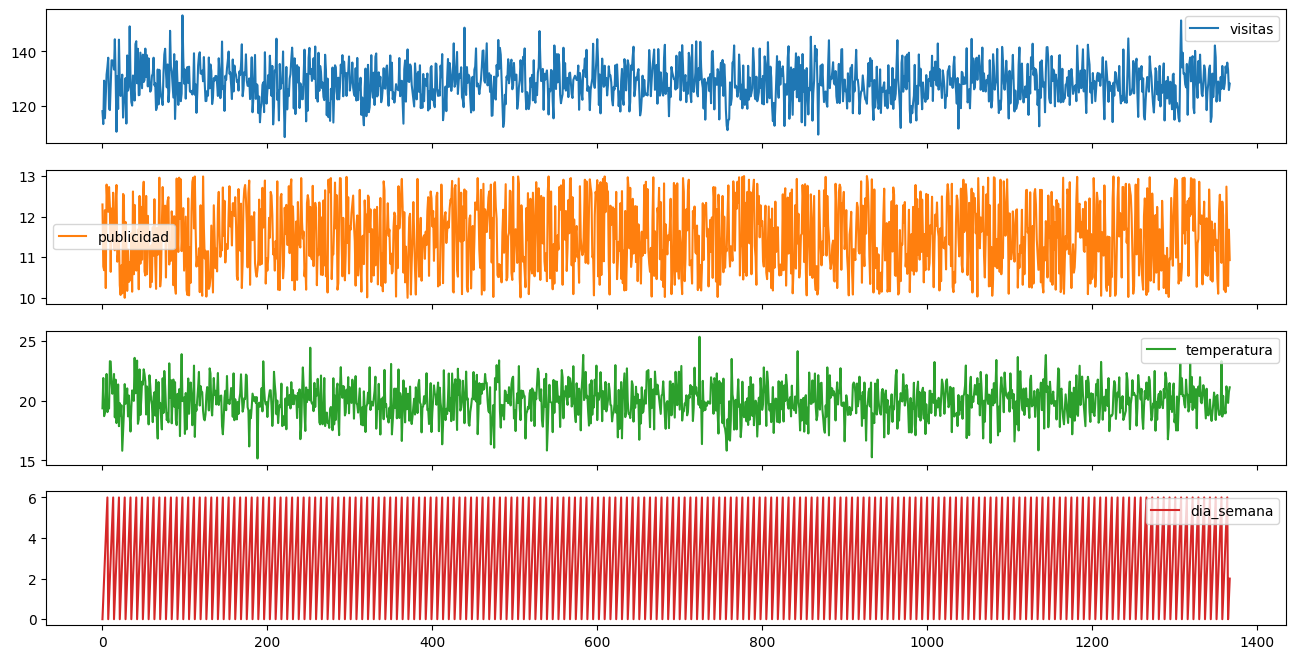

In [ ]:
df.plot(subplots=True,figsize=(16,8))

## Autocorrelacion

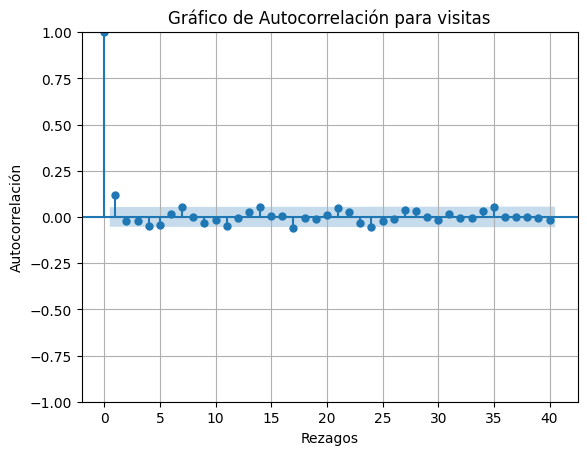

In [ ]:
plot_acf(df['visitas'], lags=40)  # puedes ajustar el número de rezagos con lags
plt.title('Gráfico de Autocorrelación para visitas')
plt.xlabel('Rezagos')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

## Rezagos

In [ ]:
# Crear los rezagos
for lag in range(1, 11):
    df[f'visitas_lag_{lag}'] = df['visitas'].shift(lag)

In [ ]:
df.head()

,visitas,publicidad,temperatura,dia_semana,visitas_lag_1,visitas_lag_2,visitas_lag_3,visitas_lag_4,visitas_lag_5,visitas_lag_6,visitas_lag_7,visitas_lag_8,visitas_lag_9,visitas_lag_10
0,118.04,12.30,19.36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,113.28,10.77,21.90,1,118.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,129.26,10.68,18.70,2,113.28,118.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115.42,12.16,18.98,3,129.26,113.28,118.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,123.35,10.24,19.86,4,115.42,129.26,113.28,118.04,NaN,NaN,NaN,NaN,NaN,NaN


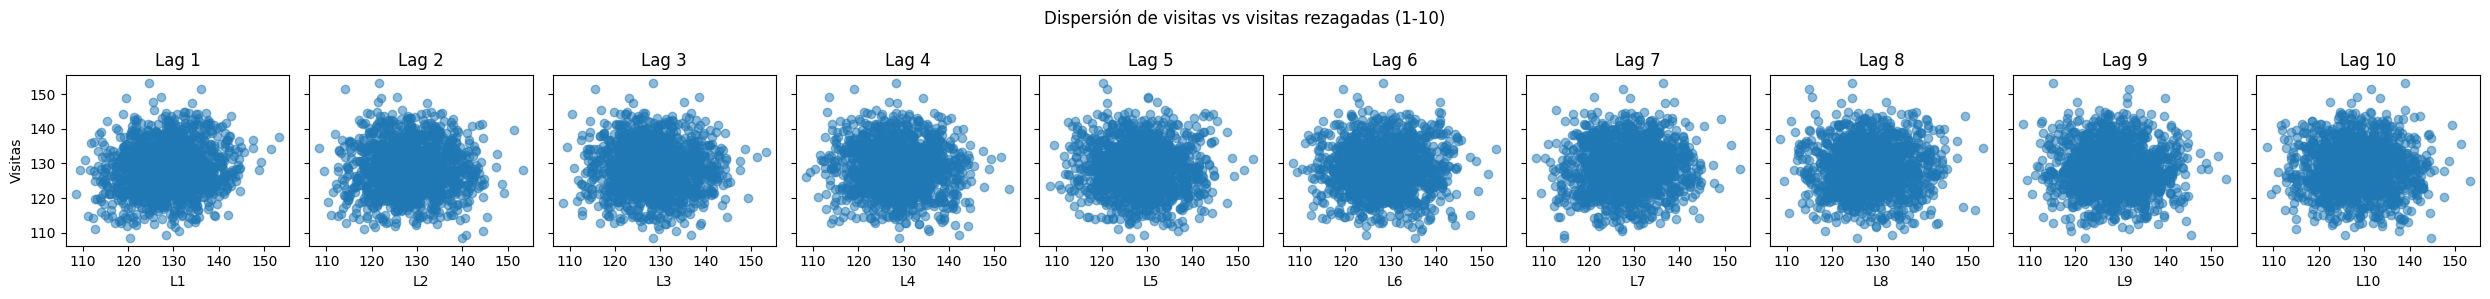

In [ ]:
# Configurar los subplots
fig, axes = plt.subplots(1, 10, figsize=(25, 3), sharey=True)

for i, lag in enumerate(range(1, 11)):
    axes[i].scatter(df[f'visitas_lag_{lag}'], df['visitas'], alpha=0.5)
    axes[i].set_title(f'Lag {lag}')
    axes[i].set_xlabel(f'L{lag}')
    if i == 0:
        axes[i].set_ylabel('Visitas')

plt.suptitle('Dispersión de visitas vs visitas rezagadas (1-10)')
plt.tight_layout()
plt.show()

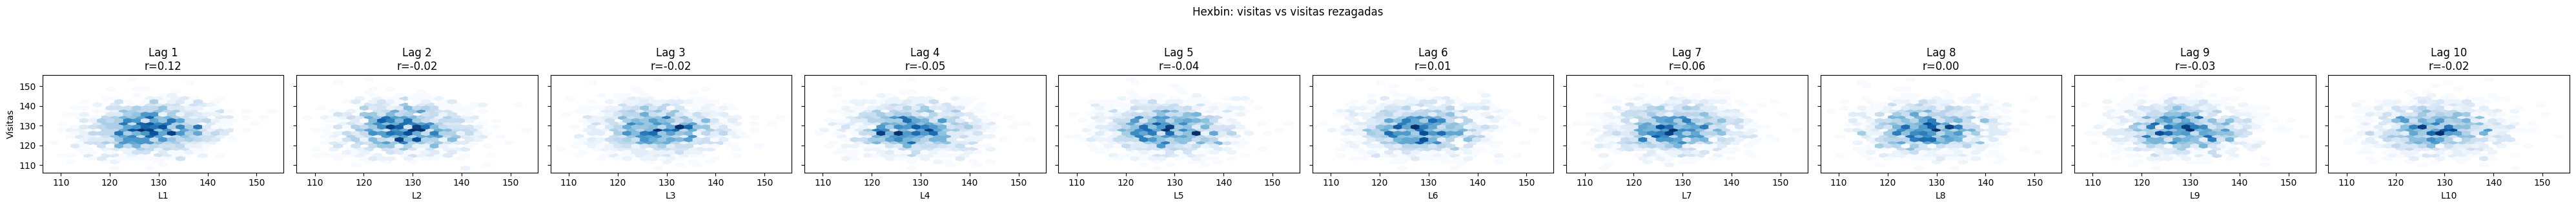

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(40, 3), sharey=True)

for i in range(10):
    col = f'visitas_lag_{i+1}'
    axes[i].hexbin(df[col], df['visitas'], gridsize=25, cmap='Blues', mincnt=1)
    r = df[['visitas', col]].corr().iloc[0, 1]
    axes[i].set_title(f"Lag {i+1}\nr={r:.2f}")
    axes[i].set_xlabel(f"L{i+1}")

axes[0].set_ylabel("Visitas")
plt.suptitle("Hexbin: visitas vs visitas rezagadas", y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
# Crear rezagos hasta el lag 10
for i in range(1, 11):
    df[f'publicidad_lag_{i}'] = df['publicidad'].shift(i)
    df[f'temperatura_lag_{i}'] = df['temperatura'].shift(i)

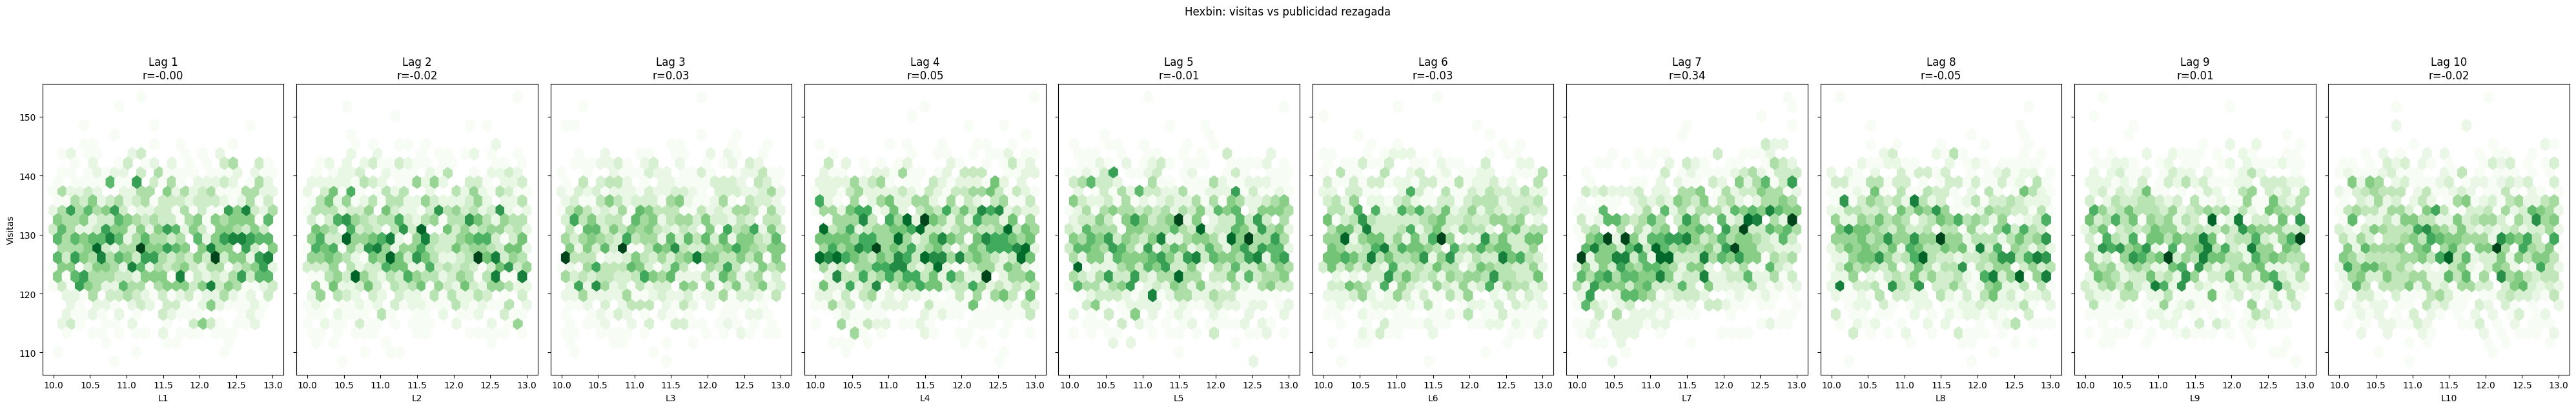

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(40, 6), sharey=True)

for i in range(10):
    col = f'publicidad_lag_{i+1}'
    axes[i].hexbin(df[col], df['visitas'], gridsize=25, cmap='Greens', mincnt=1)
    r = df[['visitas', col]].corr().iloc[0, 1]
    axes[i].set_title(f"Lag {i+1}\nr={r:.2f}")
    axes[i].set_xlabel(f"L{i+1}")

axes[0].set_ylabel("Visitas")
plt.suptitle("Hexbin: visitas vs publicidad rezagada", y=1.05)
plt.tight_layout()
plt.show()

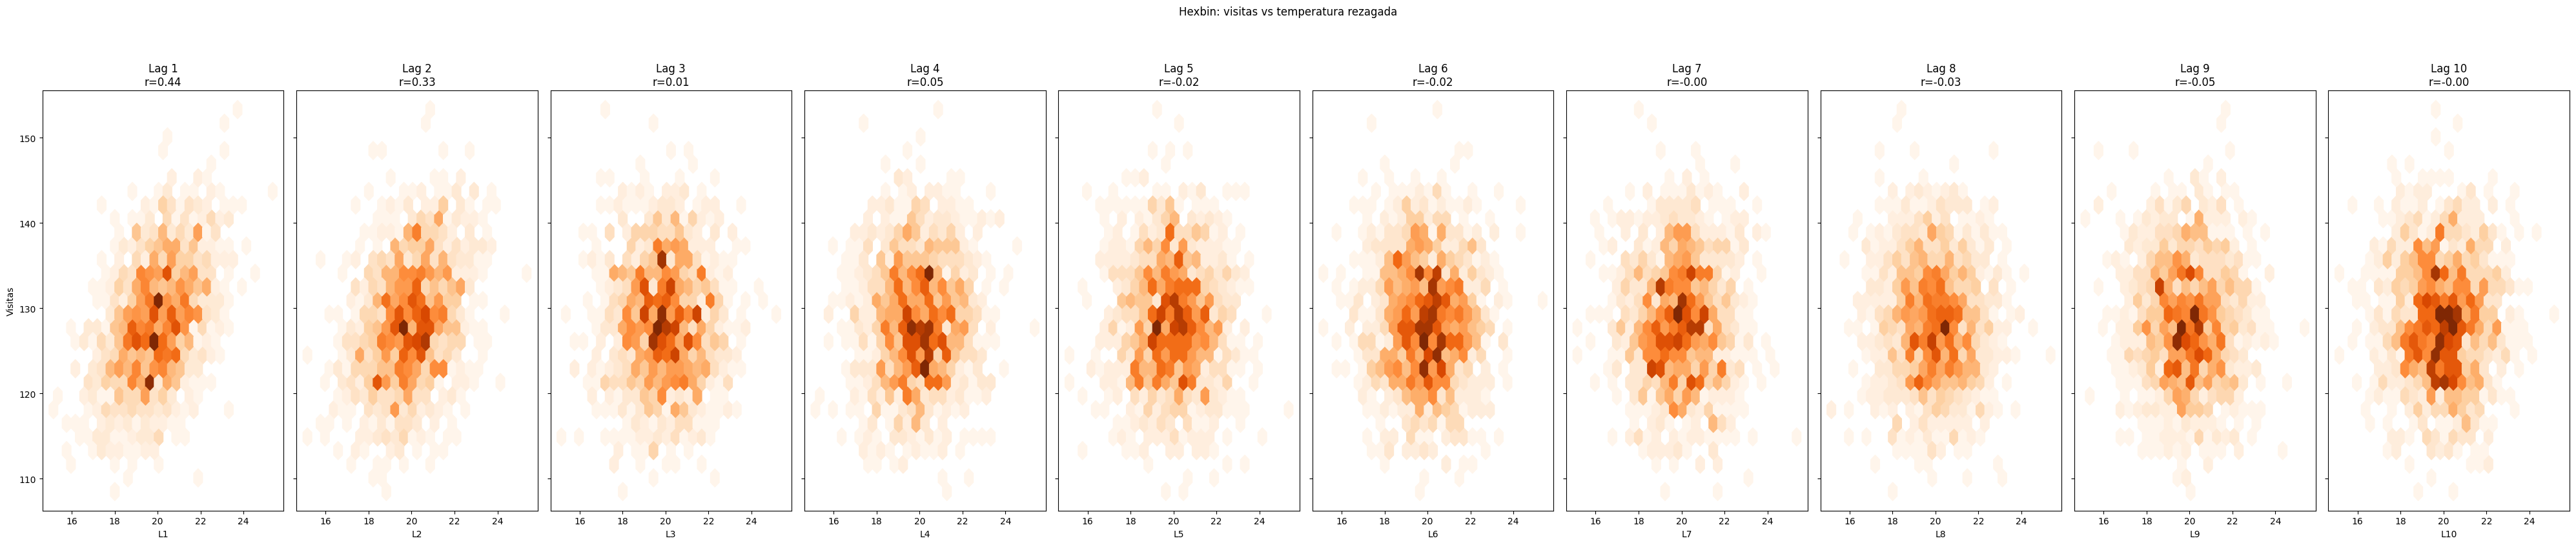

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(40, 8), sharey=True)

for i in range(10):
    col = f'temperatura_lag_{i+1}'
    axes[i].hexbin(df[col], df['visitas'], gridsize=25, cmap='Oranges', mincnt=1)
    r = df[['visitas', col]].corr().iloc[0, 1]
    axes[i].set_title(f"Lag {i+1}\nr={r:.2f}")
    axes[i].set_xlabel(f"L{i+1}")

axes[0].set_ylabel("Visitas")
plt.suptitle("Hexbin: visitas vs temperatura rezagada", y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['visitas', 'publicidad', 'temperatura', 'dia_semana', 'visitas_lag_1',
       'visitas_lag_2', 'visitas_lag_3', 'visitas_lag_4', 'visitas_lag_5',
       'visitas_lag_6', 'visitas_lag_7', 'visitas_lag_8', 'visitas_lag_9',
       'visitas_lag_10', 'publicidad_lag_1', 'temperatura_lag_1',
       'publicidad_lag_2', 'temperatura_lag_2', 'publicidad_lag_3',
       'temperatura_lag_3', 'publicidad_lag_4', 'temperatura_lag_4',
       'publicidad_lag_5', 'temperatura_lag_5', 'publicidad_lag_6',
       'temperatura_lag_6', 'publicidad_lag_7', 'temperatura_lag_7',
       'publicidad_lag_8', 'temperatura_lag_8', 'publicidad_lag_9',
       'temperatura_lag_9', 'publicidad_lag_10', 'temperatura_lag_10'],
      dtype='object')

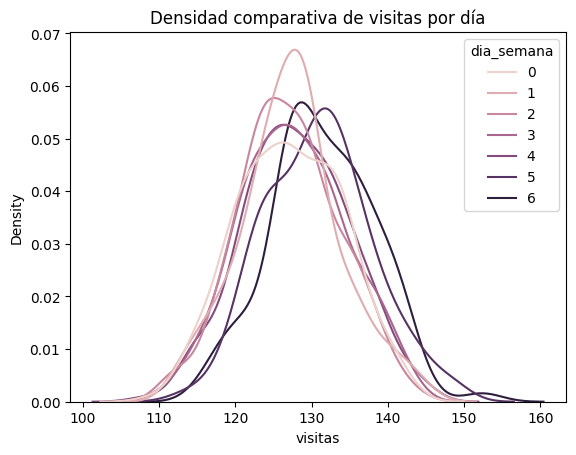

In [ ]:
sns.kdeplot(data=df, x='visitas', hue='dia_semana', common_norm=False)
plt.title('Densidad comparativa de visitas por día')
plt.show()

# Modelado

## Arbol de regresion

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
X = df[['temperatura_lag_1']]
y = df['visitas']

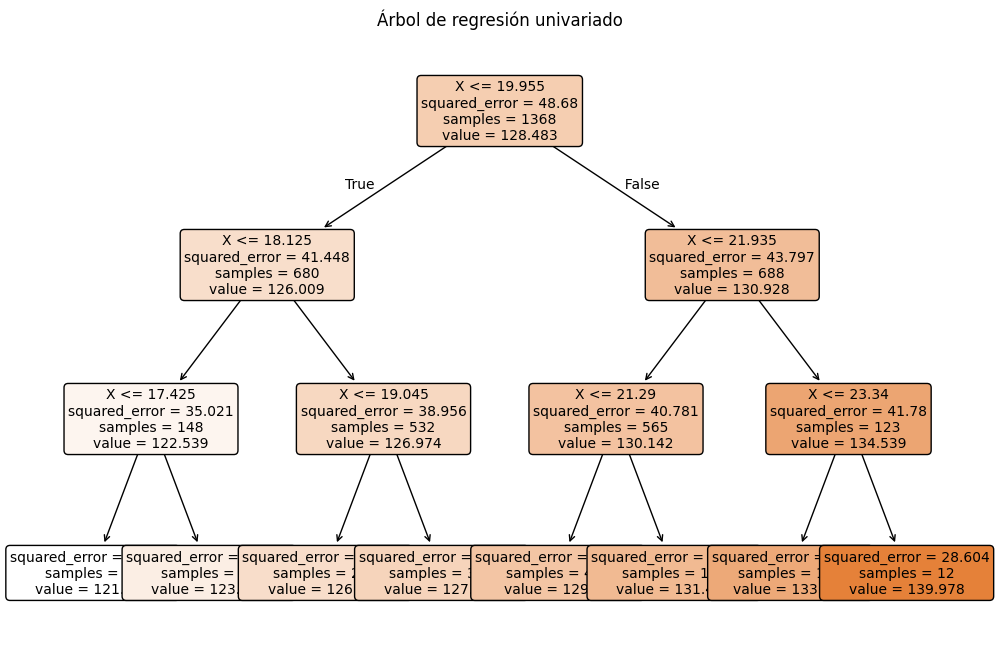

In [ ]:
regressor = DecisionTreeRegressor(max_depth=3)  # max_depth controla la profundidad del árbol
regressor.fit(X, y)

# Visualizar el árbol
plt.figure(figsize=(12,8))
plot_tree(regressor, feature_names=['X'], filled=True, rounded=True, fontsize=10)
plt.title('Árbol de regresión univariado')
plt.show()

In [ ]:
# Crear puntos para graficar la línea predicha
X_fit = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_fit = regressor.predict(X_fit)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


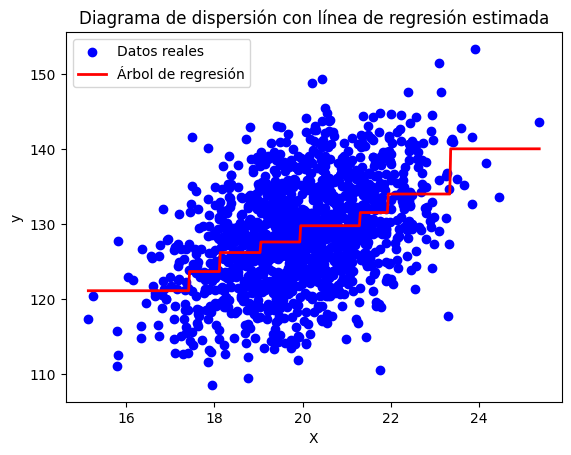

In [ ]:
# Graficar puntos originales
plt.scatter(X, y, color='blue', label='Datos reales')

# Graficar línea de regresión estimada (predicción)
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Árbol de regresión')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Diagrama de dispersión con línea de regresión estimada')
plt.legend()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Crear y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=40, max_depth=3)
rf.fit(X, y)

RandomForestRegressor(max_depth=3, n_estimators=40)

In [ ]:
# Crear puntos para la curva de predicción
X_fit = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_fit = rf.predict(X_fit)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


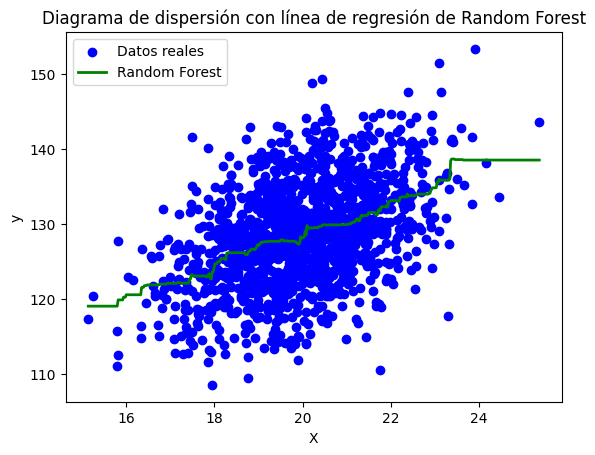

In [ ]:
plt.scatter(X, y, color='blue', label='Datos reales')

# Graficar línea de regresión estimada
plt.plot(X_fit, y_fit, color='green', linewidth=2, label='Random Forest')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Diagrama de dispersión con línea de regresión de Random Forest')
plt.legend()
plt.show()

## Modelo Final

In [ ]:
df.columns

Index(['visitas', 'publicidad', 'temperatura', 'dia_semana', 'visitas_lag_1',
       'visitas_lag_2', 'visitas_lag_3', 'visitas_lag_4', 'visitas_lag_5',
       'visitas_lag_6', 'visitas_lag_7', 'visitas_lag_8', 'visitas_lag_9',
       'visitas_lag_10', 'publicidad_lag_1', 'temperatura_lag_1',
       'publicidad_lag_2', 'temperatura_lag_2', 'publicidad_lag_3',
       'temperatura_lag_3', 'publicidad_lag_4', 'temperatura_lag_4',
       'publicidad_lag_5', 'temperatura_lag_5', 'publicidad_lag_6',
       'temperatura_lag_6', 'publicidad_lag_7', 'temperatura_lag_7',
       'publicidad_lag_8', 'temperatura_lag_8', 'publicidad_lag_9',
       'temperatura_lag_9', 'publicidad_lag_10', 'temperatura_lag_10'],
      dtype='object')

In [ ]:
x_vars = ['visitas_lag_1','temperatura_lag_1', 'temperatura_lag_2', 'publicidad_lag_7']
y_var = ['visitas']

In [ ]:
# Crear variables dummy para la columna dia_semana
dummies = pd.get_dummies(df['dia_semana'], prefix='dia')

In [ ]:
dummies

,dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
1363,False,False,False,False,False,True,False
1364,False,False,False,False,False,False,True
1365,True,False,False,False,False,False,False
1366,False,True,False,False,False,False,False


In [ ]:
df = pd.concat([df, dummies], axis=1)

In [ ]:
# Agregar las columnas dummy a la lista x_vars
x_vars = x_vars + list(dummies.columns)

In [ ]:
x_vars

['visitas_lag_1',
 'temperatura_lag_1',
 'temperatura_lag_2',
 'publicidad_lag_7',
 'dia_0',
 'dia_1',
 'dia_2',
 'dia_3',
 'dia_4',
 'dia_5',
 'dia_6']

In [ ]:
# Cantidad total de datos
n = len(df)
n_test = 160

# Índice para separar
train_end = n - n_test

# Separar X y y
X = df[x_vars]
y = df[y_var]

# División temporal: primeros datos para entrenamiento, últimos 60 para prueba
X_train = X.iloc[:train_end]
X_test = X.iloc[train_end:]

y_train = y.iloc[:train_end]
y_test = y.iloc[train_end:]

print(f'Tamaño entrenamiento: {len(X_train)}')
print(f'Tamaño prueba: {len(X_test)}')

Tamaño entrenamiento: 1208
Tamaño prueba: 160


In [ ]:
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_tr = rf.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
mse_tr = mean_squared_error(y_train, y_pred_tr)
print(f'MSE en prueba: {mse}')
print(f'MSE en entrenamiento: {mse_tr}')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE en prueba: 31.358048421131127
MSE en entrenamiento: 29.839328901911852


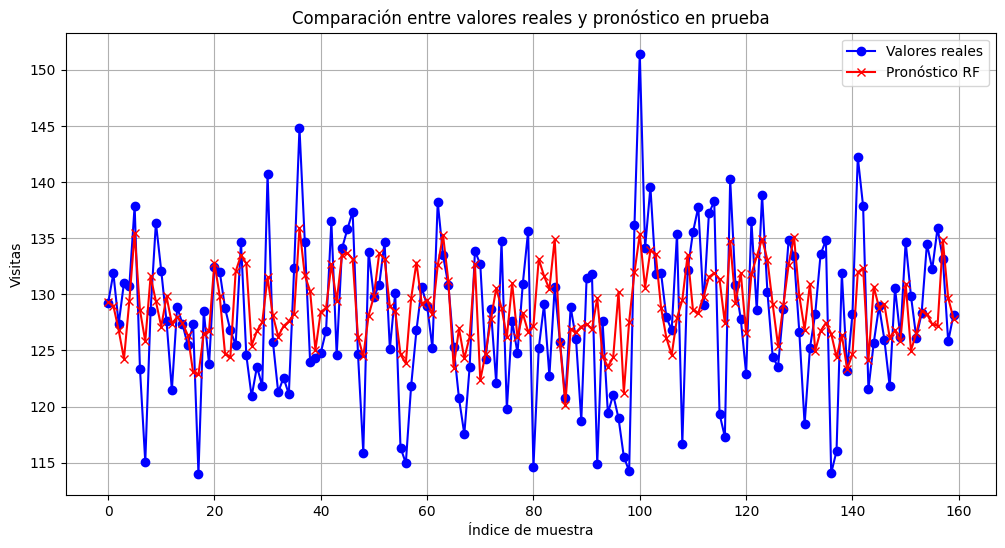

In [ ]:
plt.figure(figsize=(12,6))

# Graficar valores reales
plt.plot(y_test.values, label='Valores reales', color='blue', marker='o')

# Graficar predicciones
plt.plot(y_pred, label='Pronóstico RF', color='red', marker='x')

plt.title('Comparación entre valores reales y pronóstico en prueba')
plt.xlabel('Índice de muestra')
plt.ylabel('Visitas')
plt.legend()
plt.grid(True)
plt.show()

## Optimizacion

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define el modelo base
rf = RandomForestRegressor(random_state=42)

# Define la grilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Usamos TimeSeriesSplit para respetar el orden temporal
tscv = TimeSeriesSplit(n_splits=5)

# Define un scorer para MSE (negativo porque sklearn maximiza la métrica)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Configura GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring=mse_scorer,
    n_jobs=-1,
    verbose=2,
    refit=True  # Reentrena con mejores hiperparámetros al final
)

# Entrena con los datos completos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluación en entrenamiento y prueba usando el mejor modelo
best_rf = grid_search.best_estimator_

y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"MSE entrenamiento (mejor modelo): {mse_train:.4f}")
print(f"MSE prueba (mejor modelo): {mse_test:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Mejores hiperparámetros: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
MSE entrenamiento (mejor modelo): 24.7859
MSE prueba (mejor modelo): 27.9406


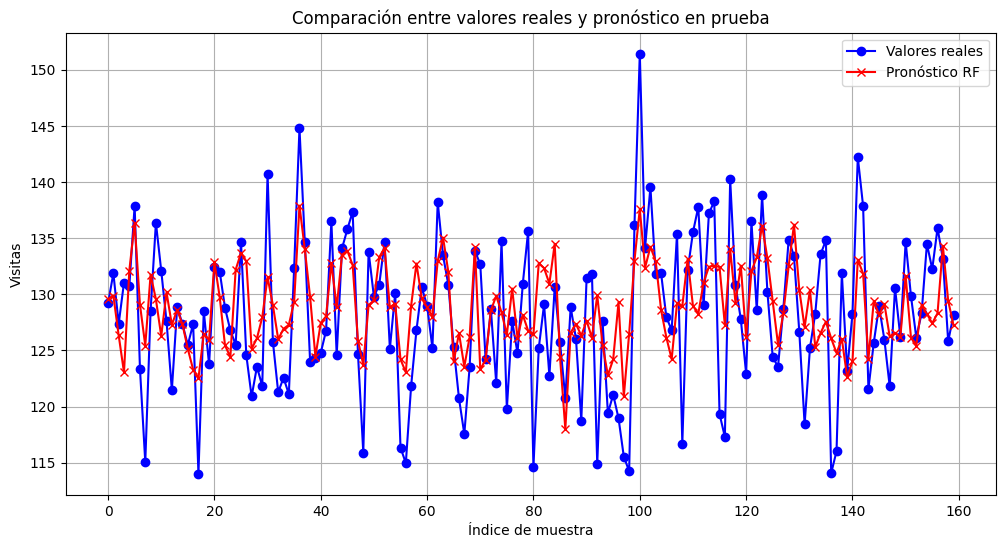

In [ ]:
plt.figure(figsize=(12,6))

# Graficar valores reales de prueba
plt.plot(y_test.values, label='Valores reales', color='blue', marker='o')

# Graficar predicciones en prueba
plt.plot(y_pred, label='Pronóstico RF', color='red', marker='x')

plt.title('Comparación entre valores reales y pronóstico en prueba')
plt.xlabel('Índice de muestra')
plt.ylabel('Visitas')
plt.legend()
plt.grid(True)
plt.show()

            Variable  Importancia
0  temperatura_lag_1     0.400465
2   publicidad_lag_7     0.260187
1  temperatura_lag_2     0.236306
9              dia_6     0.040153
8              dia_5     0.034029
5              dia_2     0.009850
4              dia_1     0.006472
3              dia_0     0.005222
6              dia_3     0.004822
7              dia_4     0.002493


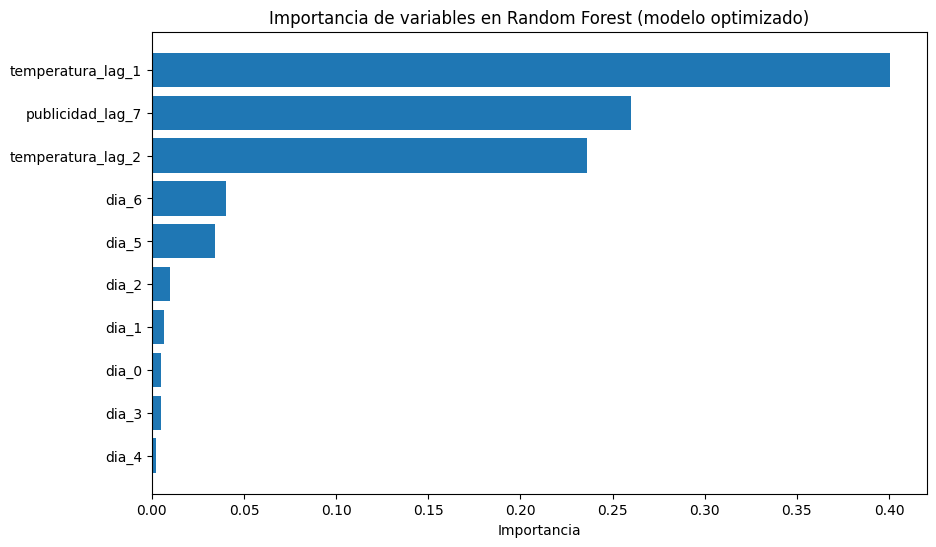

In [ ]:
# Obtener importancias
importances = best_rf.feature_importances_

# Crear DataFrame para visualizar
df_importances = pd.DataFrame({
    'Variable': x_vars,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(df_importances)

# Visualizar con gráfico de barras horizontal
plt.figure(figsize=(10,6))
plt.barh(df_importances['Variable'], df_importances['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de variables en Random Forest (modelo optimizado)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Predicciones
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Calcular R2
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 en entrenamiento: {r2_train:.4f}')
print(f'R2 en prueba: {r2_test:.4f}')

R2 en entrenamiento: 0.4940
R2 en prueba: 0.3951
